- 매매가와 전세가 지수를 비교하면서 보기
- 전세가격지수가 부동산 실수요이다.
- 가파르게 매매와 전세가 지수가 상승하다가 전세가는 떨어지는 추세를 보이면 (2009-2012) 그뒤로   12 - 15년도에 3년간에 하락하게 된다. (전남-순천)
- 전세지수가 엄청 오르지 않는데 (지지부진) 매매가격지수가 오른다고 하면 투자자들이 많이 들어온다는 뜻 -> 실숭가 아닌 앞으로 상승할것에 대한 기대가 담긴 투자 수요
- 따라서 매매가가 급격히 상승하고 전세가의 상승이 그에 상응하지 못하거나 지지부진하다면 이 지역의 부동산 매수가 아닌 매도를 고려해봐야될 시기이다.
- 반대로 전세가가 상승하고 있다고 해서 향후 해당 지역의 부동산 가격이 상승할거라고 함부로 예측하면 위험함.
- 전세가가 상승 추세더라도 매매가가 하락하는 경우와 지지부진하다면 실수요가 매매가 상승으로 이어지기까지 시간이 오래걸리거나 매매가격의 하락으로 갈수있다.

### 정리하기
- 우리의 목적은 수요가 높은 지역을 찾는것
- 부동산 수요는 실수요와 투자수요로 나눌수있다.
- 전세가격과 매매가격으로 확인가능하다 (전세 = 실수요, 매매 = 투자수요+실수요)
- 1. 전세가가 상승하면 실수요도 증가한다.
- 2. 실수요만 존재한다면 매매가가 상승한다는 것은 아니다.
- 3. 전세가만 상승하고 매매가는 지지부진할수도있다.
    - 다만 수도권처럼 몇년 기다리면 상승장을 올 수 있지만 큰돈을 투자하기에 별로..(리스크지는거에바)
- 4. 투자수요와 실수요와 함께 상승하는 지역을 찾기 위해 전세가와 매매가가 함께하는 상승하는 지역을 찾자
- 5. 전세가가 지지부진한데 매매가가 가파르게 오르면 투자수요가 높은 경우이기에 위험하다.(기대가 꺼지면 가파르게 하락)
- 6. 전세가가 빠르게 상승하는 지역, 함께 매매가랑 전세가가 상승하되 전세가율이 높아지는 지역을 찾아라
### 파이썬으로 자동화
- 이지역을 찾기위해서 매매가 상승은 어떻게 정의할까? 눈으로 시계열 그래프를 봤을때 상승한다고 하면 명확하고 정량적인 정의가 필요함.


- 이책에서는 1년전 대비 지수 증감률을 이용한다. 매매가와 전세가 지수에 대해 각각 1년전 지수값대비 현재 지수 값의 비율을 구한다.
상승했다면 해당기간동안 매매가 지수나 전세가 지수가 상승했다고 판단 음수면 하락했다고 판단.
- 매매가지수와 전세가지수의 증감률을 비교해서 또한 분석을 할수도있다.



### 정리
- 이번챕터에서 부동산에 대한 사람들의 수요를 측정해 보고자 했다.
- 여기서 수요는 실수요와 투자수요로 나눌수있다.
- 부동산 투자자 입장에서 가장 이상적인 상황은 실수요 상승에 의해 전체 수요가 상승하는 경우(실수요+투자수요 같이 상승)
- 실수요는 없는데 투자수요만 높다면 거품이 끼어있을 가능성이 높다.
- 반대로 실수요만 있고 투자수요가 없는 지역이라면 매매가가 오르지 않는 지역일 가능성이 높다.
- 이를 전략해보면 매매가 지수와 전세가 지수가 함께 상승하되 전세가 지수의 상승이 더 빨라 매매가 대비 전세가, 즉 (전세비율)이 상승하는 지역을 찾아봤다.
- 실제로 매매가 지수와 전세가 지수 데이터를 이용해 2019년부터 기준 날짜를 바꿔가며 분석해본 결과, 몇가지 예외 상황을 제외하고 수요가 상승해서 결과적으로 매매가가 상승하는 지역을 예측이 가능하다.
- 특히 2010년 초반은 지방을 중심으로 선택됐다가, 2015년 이후 서울,수도권 지역이 주로 선택 된것은 2010년 초반 지방 부동산의 상승장이 시작되고 2015년후 상승장이 수도권으로 옮겨간 현상을 잘 예측 했다.



In [1]:
# 아파트 매매, 전세 지수 데이터 전처리 시키기
import xlwings as xw
import pandas as pd

def KBpriceindex_preprocessing(path, data_type):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    # data_type : ‘매매종합’, ‘매매APT’, ‘매매연립’, ‘매매단독’, ‘전세종합’, ‘전세APT’, ‘전세연립’, ‘전세단독’ 중 하나
    
    wb = xw.Book(path)                
    sheet = wb.sheets[data_type]   
    row_num = sheet.range('A1').end('down').end('down').end('down').row 
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 
    
    # '대도시' 이름을 리스트로 정의
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')

    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])

    # 구별 데이터 처리: 작은 지역명에서 큰 지역명으로 변환
    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1

    big_col[129] = '경기'  # 특정 컬럼 수정
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    # raw_data 컬럼명을 big_col로 업데이트
    raw_data.columns = big_col

    # 데이터에서 필요없는 행이나 열 제거, 혹은 형식 변경
    raw_data = raw_data.dropna(axis=1, how='all')  # 모든 값이 NaN인 열 제거
    raw_data = raw_data.dropna(axis=0, how='all')  # 모든 값이 NaN인 행 제거

    # 숫자형 데이터가 아닌 경우, 숫자형으로 변환할 수 있는 데이터를 숫자형으로 변환
    raw_data = raw_data.apply(pd.to_numeric, errors='ignore')

    # 추가적으로 날짜 데이터나 필요한 컬럼에 대해 추가적인 전처리 가능
    # 예: raw_data['날짜'] = pd.to_datetime(raw_data['날짜'], errors='coerce')

    return raw_data


path = r'/Users/parkjunhyeok/Desktop/부동산데이터분석/★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
price_index = KBpriceindex_preprocessing(path, '매매apt')
jeonse_index = KBpriceindex_preprocessing(path, '전세apt')

/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_35121/746613733.py:47: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  raw_data = raw_data.apply(pd.to_numeric, errors='ignore')
/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_35121/746613733.py:47: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  raw_data = raw_data.apply(pd.to_numeric, errors='ignore')


In [2]:
price_index

,구분,전국,서울,서울,서울,서울,서울,서울,서울,서울,...,경남,경남,경남,경남,경남,경남,경남,제주도,제주도,기타지방
0,None,None,None,None,강북구,광진구,노원구,도봉구,동대문구,마포구,...,의창구,진해구,None,None,None,None,None,None,None,None
1,Classification,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,...,Uichang,Jinhae,Yangsan,Geoje,Jinju,Kimhae,Tongyoung,Jeju-do,Jeju/\nSeogwipo,Non-Metropolitan Area
2,86.1,20.973143,17.152933,24.274004,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2.0,20.973143,17.182661,24.234211,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,3.0,20.934518,17.152933,24.194418,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,9.0,99.315569,97.715531,97.378073,97.425358,98.136013,96.90432,96.708957,97.255464,97.899248,...,100.906592,100.917725,100.306709,102.728627,101.875807,102.743032,102.949463,None,100.005979,101.20823
395,10.0,99.925783,99.51197,99.330102,99.485541,99.665064,99.229948,98.914134,99.305096,99.62169,...,100.664665,100.550435,100.233542,100.736581,101.411979,101.794236,101.546372,None,100.03476,100.82083
396,11.0,100.029606,99.905134,99.828795,99.902302,99.963545,99.854408,99.686066,99.875128,99.859287,...,100.472113,100.247587,100.213092,100.388472,100.853603,100.992391,100.594303,None,100.10176,100.344251
397,12.0,100.028384,100.013687,99.99642,99.938894,100.0,100.022485,99.93996,100.0,99.988745,...,100.2323,100.090878,100.0,100.0,100.256951,100.440358,100.182383,None,100.039535,100.080281


In [3]:
jeonse_index

,구분,전국,서울,서울,서울,서울,서울,서울,서울,서울,...,경남,경남,경남,경남,경남,경남,경남,제주도,제주도,기타지방
0,None,None,None,None,강북구,광진구,노원구,도봉구,동대문구,마포구,...,의창구,진해구,None,None,None,None,None,None,None,None
1,Classification,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,...,Uichang,Jinhae,Yangsan,Geoje,Jinju,Gimhae,Tongyoung,Jeju-do,Jeju/\nSeogwipo,Non-Metropolitan Area
2,86.1,10.793216,9.781736,10.730506,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2.0,11.10426,10.195465,10.856377,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,3.0,11.446408,10.55009,11.139587,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,9.0,100.12584,99.602616,99.656654,99.304604,99.37781,99.761888,99.586397,99.43874,100.145847,...,100.44065,100.210172,99.247763,101.979251,102.866648,102.492009,101.672431,None,100.038224,100.721752
395,10.0,100.183577,100.078189,99.977296,99.766398,99.754318,99.930618,99.981109,99.662319,100.310314,...,100.422059,100.391951,99.634432,100.677844,102.297987,101.726308,100.601969,None,100.062307,100.522088
396,11.0,100.166124,100.196822,100.096278,100.011762,99.950959,100.044284,100.054956,99.94931,100.205906,...,100.25456,100.242159,99.910311,100.539555,101.305145,100.85959,100.117784,None,100.077047,100.253491
397,12.0,100.066188,100.101366,100.063488,100.01175,100.0,100.035364,100.101514,100.0,100.125514,...,100.186391,100.0,100.0,100.0,100.409319,100.452,100.0,None,100.058631,100.072182


In [4]:
import xlwings as xw

def KBpriceindex_preprocessing(path, data_type):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    # data_type : ‘매매종합’, ‘매매APT’, ‘매매연립’, ‘매매단독’, ‘전세종합’, ‘전세APT’, ‘전세연립’, ‘전세단독’ 중 하나
    
    wb = xw.Book(path)                
    sheet = wb.sheets[data_type]   
    row_num = sheet.range('A1').end('down').end('down').end('down').row 
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 
    
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])

    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1
                
    big_col[129] = '경기' 
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1])
    
    index_list = list(new_col_data['구분']['구분'])

    new_index = []

    for num, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        if int(temp[0]) > 20 :
            if len(temp[0]) == 2:
                new_index.append('19' + temp[0] + '.' + temp[1])
            else:
                new_index.append(temp[0] + '.' + temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data

In [5]:
import pandas as pd

path = r'/Users/parkjunhyeok/Desktop/부동산데이터분석/★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
price_index = KBpriceindex_preprocessing(path, '매매apt')
jeonse_index = KBpriceindex_preprocessing(path, '전세apt')

/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_35121/2256233483.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_35121/2256233483.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_col_data.set_index(pd.to_datetime(new_index), inplace=True)


In [6]:
price_index

전국          서울                                   \
                    전국          서울         강북        강북구        광진구   
1986-01-01   20.973143   17.152933  24.274004       None       None   
1986-02-01   20.973143   17.182661  24.234211       None       None   
1986-03-01   20.934518   17.152933  24.194418       None       None   
1986-04-01   20.818644   17.034022  24.035244       None       None   
1986-05-01   20.664146   16.944839  23.716896       None       None   
...                ...         ...        ...        ...        ...   
2018-09-01   99.315569   97.715531  97.378073  97.425358  98.136013   
2018-10-01   99.925783    99.51197  99.330102  99.485541  99.665064   
2018-11-01  100.029606   99.905134  99.828795  99.902302  99.963545   
2018-12-01  100.028384  100.013687   99.99642  99.938894      100.0   
2019-01-01       100.0       100.0      100.0      100.0      100.0   

                                                                    ...  \
                   노원구        도봉구       동대문구        마포구       서대문구  ...   
1986-01-01        None       None       None       None       None  ...   
1986-02-01        None       None       None       None       None  ...   
1986-03-01        None       None       None       None       None  ...   
1986-04-01        None       None       None       None       None  ...   
1986-05-01        None       None       None       None       None  ...   
...                ...        ...        ...        ...        ...  ...   
2018-09-01    96.90432  96.708957  97.255464  97.899248    97.3124  ...   
2018-10-01   99.229948  98.914134  99.305096   99.62169  99.371412  ...   
2018-11-01   99.854408  99.686066  99.875128  99.859287  99.814382  ...   
2018-12-01  100.022485   99.93996      100.0  99.988745      100.0  ...   
2019-01-01       100.0      100.0      100.0      100.0      100.0  ...   

                    경남                                                  \
                   의창구         진해구          양산          거제          진주   
1986-01-01        None        None        None        None        None   
1986-02-01        None        None        None        None        None   
1986-03-01        None        None        None        None        None   
1986-04-01        None        None        None        None        None   
1986-05-01        None        None        None        None        None   
...                ...         ...         ...         ...         ...   
2018-09-01  100.906592  100.917725  100.306709  102.728627  101.875807   
2018-10-01  100.664665  100.550435  100.233542  100.736581  101.411979   
2018-11-01  100.472113  100.247587  100.213092  100.388472  100.853603   
2018-12-01    100.2323  100.090878       100.0       100.0  100.256951   
2019-01-01       100.0       100.0       100.0       100.0       100.0   

                                     제주도                    기타지방  
                    김해          통영   제주도         서귀포        기타지방  
1986-01-01        None        None  None        None        None  
1986-02-01        None        None  None        None        None  
1986-03-01        None        None  None        None        None  
1986-04-01        None        None  None        None        None  
1986-05-01        None        None  None        None        None  
...                ...         ...   ...         ...         ...  
2018-09-01  102.743032  102.949463  None  100.005979   101.20823  
2018-10-01  101.794236  101.546372  None   100.03476   100.82083  
2018-11-01  100.992391  100.594303  None   100.10176  100.344251  
2018-12-01  100.440358  100.182383  None  100.039535  100.080281  
2019-01-01       100.0       100.0  None       100.0       100.0  

[397 rows x 186 columns]

In [7]:
# !pip install python-dateutil

In [8]:
# 매매가 지수 데이터 프레임에서 특정 날짜를 기준으로 데이터 가져오기
from datetime import datetime
from dateutil.relativedelta import relativedelta

index_date = datetime(2010, 1, 1) 
time_range = 12
prev_date = index_date - relativedelta(months=time_range)

print(index_date) # 2010-01-01
print(prev_date) # 2009-01-01

price_index.loc[index_date]

2010-01-01 00:00:00
2009-01-01 00:00:00


전국    전국      78.087161
서울    서울      82.455087
      강북      84.232411
      강북구     88.872226
      광진구      80.58185
                ...    
경남    김해      66.239785
      통영           None
제주도   제주도          None
      서귀포     62.336142
기타지방  기타지방    74.395461
Name: 2010-01-01 00:00:00, Length: 186, dtype: object

- 특정 날짜를 기준으로 모든 지역의 가격지수 증감률 계산하기
    - 증감률 = 현재 날짜 지수값 - 이전 날짜 지수 값 /이전 날짜 지수값

In [9]:
# 1년 동안의 매매가 지수 증감 구하기

(price_index.loc[index_date] - price_index.loc[prev_date])/price_index.loc[prev_date]

전국    전국      0.024178
서울    서울      0.036148
      강북      0.015827
      강북구     -0.00328
      광진구     0.021929
                ...   
경남    김해      0.021828
      통영           NaN
제주도   제주도          NaN
      서귀포     0.026418
기타지방  기타지방    0.027169
Length: 186, dtype: object

In [10]:
# 매매가,전세가 지수 증감률을 계산해서 데이터프레임 형식으로 저장
demand_df = pd.DataFrame()
demand_df['매매증감률'] = (price_index.loc[index_date] - price_index.loc[prev_date])/ price_index.loc[prev_date]
demand_df['전세증감률'] = (jeonse_index.loc[index_date] - jeonse_index.loc[prev_date])/jeonse_index.loc[prev_date]


In [12]:
demand_df.head(10)

매매증감률     전세증감률
전국 전국    0.024178  0.062333
서울 서울    0.036148  0.105536
   강북    0.015827  0.071413
   강북구   -0.00328  0.038468
   광진구   0.021929  0.147834
   노원구   0.020897  0.075796
   도봉구   0.008598  0.080863
   동대문구  0.015278  0.050224
   마포구   0.053329  0.114332
   서대문구  0.006794  0.035622

In [14]:
# 기준 날짜의 매매가 지수와 지난 3년 동안의 최댓값 비교
# 기준 날짜로부터 3년간의 데이터 가져오기
prev_date2 = index_date - relativedelta(months=time_range*3) # 3년전 날짜는 1년전 날짜를 구할때처럼 relativedelta함수를 이용 time_range는 12 (1년의미) 3년이니 *3을 함
price_index[prev_date2:index_date][:-1] # 2007년부터 2010년까지 데이터를 가져오게됨 기준날짜인 2010년 1월은 빼야하므로 하나전까지 :-1을 함

전국         서울                                              \
                   전국         서울         강북        강북구        광진구        노원구   
2007-01-01  74.198664  76.468638    72.4476  72.693951  82.961419  67.567793   
2007-02-01  74.420995  76.704761  72.904659  73.606866  83.080946  68.005062   
2007-03-01  74.489387  76.829383  73.153308  74.979981  83.153168  68.279547   
2007-04-01  74.484831  76.822737  73.499433  75.465691  83.022853  68.652033   
2007-05-01  74.406249  76.667758  73.607201  75.645772  82.580293  68.798253   
2007-06-01  74.431309  76.708965  73.787359    75.8986   82.40908  68.972586   
2007-07-01  74.554335  76.940573  74.177943  76.801204  82.256833  69.347806   
2007-08-01  74.655244  77.101755  74.487166  77.262136  82.308565  69.724091   
2007-09-01  74.766896  77.270739  74.827308   78.45266   82.40509  70.085176   
2007-10-01  74.886101  77.470719  75.317784  79.065281  82.333011  71.029187   
2007-11-01  75.001622  77.715036  75.951695  80.677432  82.383706   71.90545   
2007-12-01  75.031776  77.823326  76.321376  82.052744  82.281146  72.611943   
2008-01-01  75.161311  78.199216  77.020336  83.014182  82.311276  74.046175   
2008-02-01  75.330654  78.619932  77.812781  83.982524  82.321098  75.805155   
2008-03-01  75.793498  79.707867  79.740119  84.472994  82.631177  80.073886   
2008-04-01  76.528982  81.282136  82.503431  87.774642  83.011799   85.13589   
2008-05-01   76.97524  81.968157  83.625386  89.335774  83.305163  86.866884   
2008-06-01  77.394755   82.38846  84.365795  90.420176  83.370589  87.817963   
2008-07-01  77.638711  82.589007  84.775249  90.934336  83.414655  88.262576   
2008-08-01  77.731522  82.582447   84.86342  91.056337  83.438662   88.26288   
2008-09-01  77.897348  82.595777  84.973577  91.125252  83.424081  88.257346   
2008-10-01  77.844245  82.345766  84.897992  91.125252  83.247644  88.192345   
2008-11-01  77.431468   81.65085  84.529789  91.035629  82.385908  87.678476   
2008-12-01  76.758285    80.3135  83.465483  89.445811  79.423776  86.222282   
2009-01-01  76.243745   79.57848  82.920041  89.164656  78.852708  85.370613   
2009-02-01  76.013492  79.444034  82.401624  88.711496  78.705878  84.179958   
2009-03-01  75.832499  79.242567  82.076512   88.10189   78.70102  83.844161   
2009-04-01  75.868102  79.520544  82.040344  87.974379  78.859727  83.642088   
2009-05-01  75.975717  79.657547  82.030893  87.935381  78.746117  83.609668   
2009-06-01  76.148536  80.054688  82.276251  87.813728  78.667603  84.085682   
2009-07-01  76.406035  80.759429  82.822519  87.819453  79.039476  85.280283   
2009-08-01  76.648833  81.172409  83.147405  88.170582  79.326978  85.817931   
2009-09-01  77.264938  82.134599   83.93477  88.567361  79.908617   86.78221   
2009-10-01  77.579673  82.421877  84.241336  88.730245   80.01546  87.263906   
2009-11-01  77.835187  82.404617  84.250076  88.816211  80.481023  87.248505   
2009-12-01  77.972536  82.382003  84.246717  88.829559  80.503781  87.266892   

                                                        ...    경남             \
                  도봉구       동대문구        마포구       서대문구  ...   의창구        진해구   
2007-01-01  75.540934  70.826348  73.522853  72.234805  ...  None  75.859428   
2007-02-01  76.099548  71.152885  73.608528  72.783549  ...  None  75.953925   
2007-03-01  76.348467  71.229165  73.948509  73.001737  ...  None  75.763854   
2007-04-01  76.859285  71.884142  74.013337  73.234147  ...  None  75.786362   
2007-05-01  77.099109  72.150688  74.029413  73.279322  ...  None  75.808566   
2007-06-01  77.484589  72.435339  73.933086  73.300696  ...  None  75.653477   
2007-07-01  78.328463  73.017514  73.911746  73.859167  ...  None  75.530119   
2007-08-01  79.167005  73.244572  73.959275  74.037547  ...  None  75.603603   
2007-09-01  79.444107  73.590119  74.084947  74.274143  ...  None  75.560989   
2007-10-01  79.750601  74.071288  74.153641  74.688529  ...  None  75.486591   
2007-11-01   80.28

In [15]:
# demand_df에 이전 최댓값과 기준 날짜 값의 최댓값 대비 증감률을 계산해서 저장했다.
demand_df['이전최대값'] = price_index[prev_date2:index_date][:-1].max()
demand_df['최댓값대비증감률'] = (price_index.loc[index_date] - demand_df['이전최대값']) /demand_df['이전최대값']

### 앞에서 만든 수요 전략 구현
- 어떤 지역의 수요가 높을까에서 설정한 전략들을 구현하기 위해 재료들을 저장함
- 이를 이용해 전략을 구현해서 실수요가 매매가로 이어질 가능성이 높은 지역을 뽑자
- 먼저 지난 1년동안 매매가가 상승한 지역을 찾아보자
- 지수 증감률이 양수인 지역
 - 0.01보다 큰 지역

In [16]:
demand_df['매매가상승'] = demand_df['매매증감률'] > 0.01
demand_df['전세가상승'] = demand_df['전세증감률'] > 0.01

In [20]:
demand_df[['매매가상승','전세가상승']].head(14)

매매가상승  전세가상승
전국 전국     True   True
서울 서울     True   True
   강북     True   True
   강북구   False   True
   광진구    True   True
   노원구    True   True
   도봉구   False   True
   동대문구   True   True
   마포구    True   True
   서대문구  False   True
   성동구   False   True
   성북구   False   True
   용산구    True   True
   은평구   False   True

In [21]:
demand_df['더빠른전세상승'] = demand_df['전세증감률'] > demand_df['매매증감률']
demand_df['최댓값대비상승'] = demand_df['최댓값대비증감률'] > 0

In [23]:
demand_df[['더빠른전세상승','최댓값대비상승','매매가상승','전세가상승']].head(10)
# 동대문구,,

더빠른전세상승  최댓값대비상승  매매가상승  전세가상승
전국 전국       True     True   True   True
서울 서울       True    False   True   True
   강북       True    False   True   True
   강북구      True    False  False   True
   광진구      True    False   True   True
   노원구      True    False   True   True
   도봉구      True    False  False   True
   동대문구     True     True   True   True
   마포구      True    False   True   True
   서대문구     True    False  False   True

In [24]:
demand_df['수요총합'] = demand_df[['매매가상승','전세가상승','더빠른전세상승','최댓값대비상승']].sum(axis=1)

In [25]:
demand_df = demand_df[demand_df['수요총합'] == 4]

In [27]:
demand_df

매매증감률     전세증감률      이전최대값  최댓값대비증감률  매매가상승  전세가상승  더빠른전세상승  \
전국    전국     0.024178  0.062333  77.972536   0.00147   True   True     True   
서울    동대문구   0.015278  0.050224  81.585679  0.001326   True   True     True   
      종로구    0.033816  0.055268  87.763135  0.001398   True   True     True   
      강남     0.053193  0.134123  80.941221  0.000815   True   True     True   
      영등포구   0.044627  0.082925  77.730225   0.00269   True   True     True   
6개광역시 6개광역시  0.028194  0.047738  69.036974  0.003211   True   True     True   
부산    부산     0.067447  0.072924  63.838859  0.006188   True   True     True   
      중구     0.028688  0.029058  78.862428  0.000339   True   True     True   
      동래구    0.052073  0.067137  62.731047  0.005814   True   True     True   
      북구     0.075813   0.10479  62.441889   0.00986   True   True     True   
      해운대구   0.079526   0.08305  65.242276  0.009691   True   True     True   
      사하구    0.074493  0.086623  66.485535  0.004737   True   True     True   
      금정구     0.04519  0.056435  66.986602  0.003933   True   True     True   
      사상구    0.080111  0.097206  60.348896   0.00558   True   True     True   
광주    남구     0.015637  0.042579  62.987446  0.004899   True   True     True   
대전    대전     0.067899  0.125325  74.231991  0.006113   True   True     True   
      동구     0.065121  0.097178  74.696181  0.005757   True   True     True   
      중구     0.041137  0.080917  73.057171  0.004514   True   True     True   
      서구     0.095841  0.174832  74.793651  0.007916   True   True     True   
      유성구    0.045822  0.140364  77.913834  0.003741   True   True     True   
울산    울산     0.028486  0.041204  72.816333  0.003306   True   True     True   
      동구     0.010296  0.028178  79.246544  0.000001   True   True     True   
      북구      0.05098  0.064285  76.330267  0.002443   True   True     True   
      울주군    0.010208  0.045699  67.101076  0.000204   True   True     True   
5개광역시 5개광역시  0.035761  0.051944  63.906451  0.004037   True   True     True   
충북    충북     0.018922  0.042364  71.373266  0.002155   True   True     True   
      청주     0.021253  0.039222  71.384823  0.001913   True   True     True   
      상당구    0.036246  0.045287  74.318468  0.001217   True   True     True   
      흥덕구    0.011129  0.035166  69.913379  0.002395   True   True     True   
전북    전북     0.061763  0.076595  77.924257  0.004039   True   True     True   
      덕진구    0.075155  0.079114  74.446891  0.003668   True   True     True   
      익산     0.057457  0.075724  79.263709  0.004751   True   True     True   
전남    전남     0.044728   0.05371  78.865757  0.005871   True   True     True   
      목포     0.023157  0.023657  71.511515  0.002292   True   True     True   
      순천      0.02023  0.030745  84.143193   0.00671   True   True     True   
      여수     0.062314    0.0848  76.506255  0.001512   True   True     True   
경남    경남     0.033271  0.044384  73.936273  0.002569   True   True     True   
      창원     0.036726  0.045938  75.860842  0.003456   True   True     True   
      양산     0.013679  0.051473  63.966163  0.002366   True   True     True   
      거제     0.113989  0.114671  97.402669  0.000454   True   True     True   
제주도   서귀포    0.026418  0.030383  62.124924    0.0034   True   True     True   
기타지방  기타지방   0.027169  0.036905  74.214664  0.002436   True   True     True   

             최댓값대비상승  수요총합  
전국    전국        True     4  
서울    동대문구      True     4  
      종로구       True     4  
      강남        True     4  
      영등포구      True     4  
6개광역시 6개광역시     True     4  
부산    부산        True     4  
      중구        True     4  
      동래구       True     4  
      북구        True     4  
      해운대구      True     4  
      사하구       True     4  
      금정구       True     4  
      사상구       True     4  
광주    남구        True     4  
대전    대전        True     4  
      동구        True     4  
      중구        True     4  
      서구        True     4  
      유성구       True     4  
울산    울산 

In [26]:
demand_df.loc[[('서울','동대문구'), ('부산', '중구')]]

,,매매증감률,전세증감률,이전최대값,최댓값대비증감률,매매가상승,전세가상승,더빠른전세상승,최댓값대비상승,수요총합
서울,동대문구,0.015278,0.050224,81.585679,0.001326,True,True,True,True,4
부산,중구,0.028688,0.029058,78.862428,0.000339,True,True,True,True,4


In [28]:
seleted_index = []

for name in demand_df.index:
    if name[0] is not name[1]:
        seleted_index.append((name[0], name[1]))
        
demand_df = demand_df.loc[seleted_index]

In [33]:
# 함수화
def demand(price_index, jeonse_index, index_date, time_range):

    prev_date = index_date - relativedelta(months=time_range)
    prev_date2 = index_date - relativedelta(months=time_range*3)

    demand_df = pd.DataFrame()
    demand_df['매매증감률'] = (price_index.loc[index_date] - price_index.loc[prev_date])/ price_index.loc[prev_date].replace(0,None)
    demand_df['전세증감률'] = (jeonse_index.loc[index_date] - jeonse_index.loc[prev_date])/jeonse_index.loc[prev_date].replace(0,None)
    demand_df['이전최대값'] = price_index[prev_date2:index_date][:-1].max()
    demand_df['최댓값대비증감률'] = (price_index.loc[index_date] - demand_df['이전최대값']) /demand_df['이전최대값'].replace(0,None)

    demand_df['매매가상승'] = demand_df['매매증감률'] > 0.01
    demand_df['전세가상승'] = demand_df['전세증감률'] > 0.01
    demand_df['더빠른전세상승'] = demand_df['전세증감률'] > demand_df['매매증감률']
    demand_df['최댓값대비상승'] = demand_df['최댓값대비증감률'] > 0
    demand_df['수요총합'] = demand_df[['매매가상승','전세가상승','더빠른전세상승','최댓값대비상승']].sum(axis=1)

    demand_df = demand_df[demand_df['수요총합'] == 4]

    seleted_index = []

    for name in demand_df.index:
        if name[0] is not name[1]:
            seleted_index.append((name[0], name[1]))

    demand_df = demand_df.loc[seleted_index]
    
    return demand_df

path = r'/Users/parkjunhyeok/Desktop/부동산데이터분석/★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
price_index = KBpriceindex_preprocessing(path, '매매apt')
jeonse_index = KBpriceindex_preprocessing(path, '전세apt')

index_date = datetime(2010, 1, 1)
time_range = 12

demand_ex = demand(price_index, jeonse_index, index_date, time_range)

/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_35121/2256233483.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_35121/2256233483.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_col_data.set_index(pd.to_datetime(new_index), inplace=True)


In [34]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline


rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

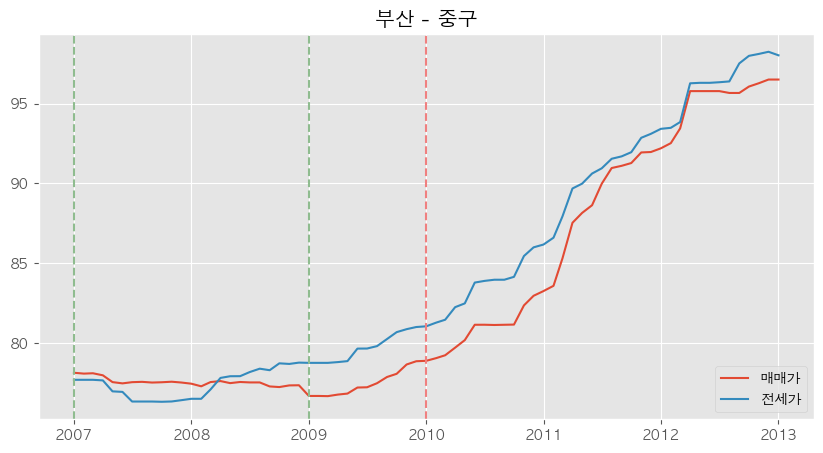

In [31]:
si = '부산'
gu = '중구'
index_date = datetime(2010, 1, 1)

prev_date = index_date - relativedelta(months=12)
prev_date2 = index_date - relativedelta(months=36)
graph_start = index_date - relativedelta(years=3)
graph_end = index_date + relativedelta(years=3)

plt.figure(figsize=(10, 5))
plt.title(si + ' - ' + gu)
plt.plot(price_index[si][gu][graph_start:graph_end], label='매매가')
plt.plot(jeonse_index[si][gu][graph_start:graph_end], label='전세가')
plt.axvline(x=index_date, color='lightcoral', linestyle='--')
plt.axvline(x=prev_date, color='darkseagreen', linestyle='--')
plt.axvline(x=prev_date2, color='darkseagreen', linestyle='--')
plt.legend()
plt.show()

In [35]:
for name in demand_ex.index:
    print(name)

('서울', '동대문구')
('서울', '종로구')
('서울', '강남')
('서울', '영등포구')
('부산', '중구')
('부산', '동래구')
('부산', '북구')
('부산', '해운대구')
('부산', '사하구')
('부산', '금정구')
('부산', '사상구')
('광주', '남구')
('대전', '동구')
('대전', '중구')
('대전', '서구')
('대전', '유성구')
('울산', '동구')
('울산', '북구')
('울산', '울주군')
('충북', '청주')
('충북', '상당구')
('충북', '흥덕구')
('전북', '덕진구')
('전북', '익산')
('전남', '목포')
('전남', '순천')
('전남', '여수')
('경남', '창원')
('경남', '양산')
('경남', '거제')
('제주도', '서귀포')


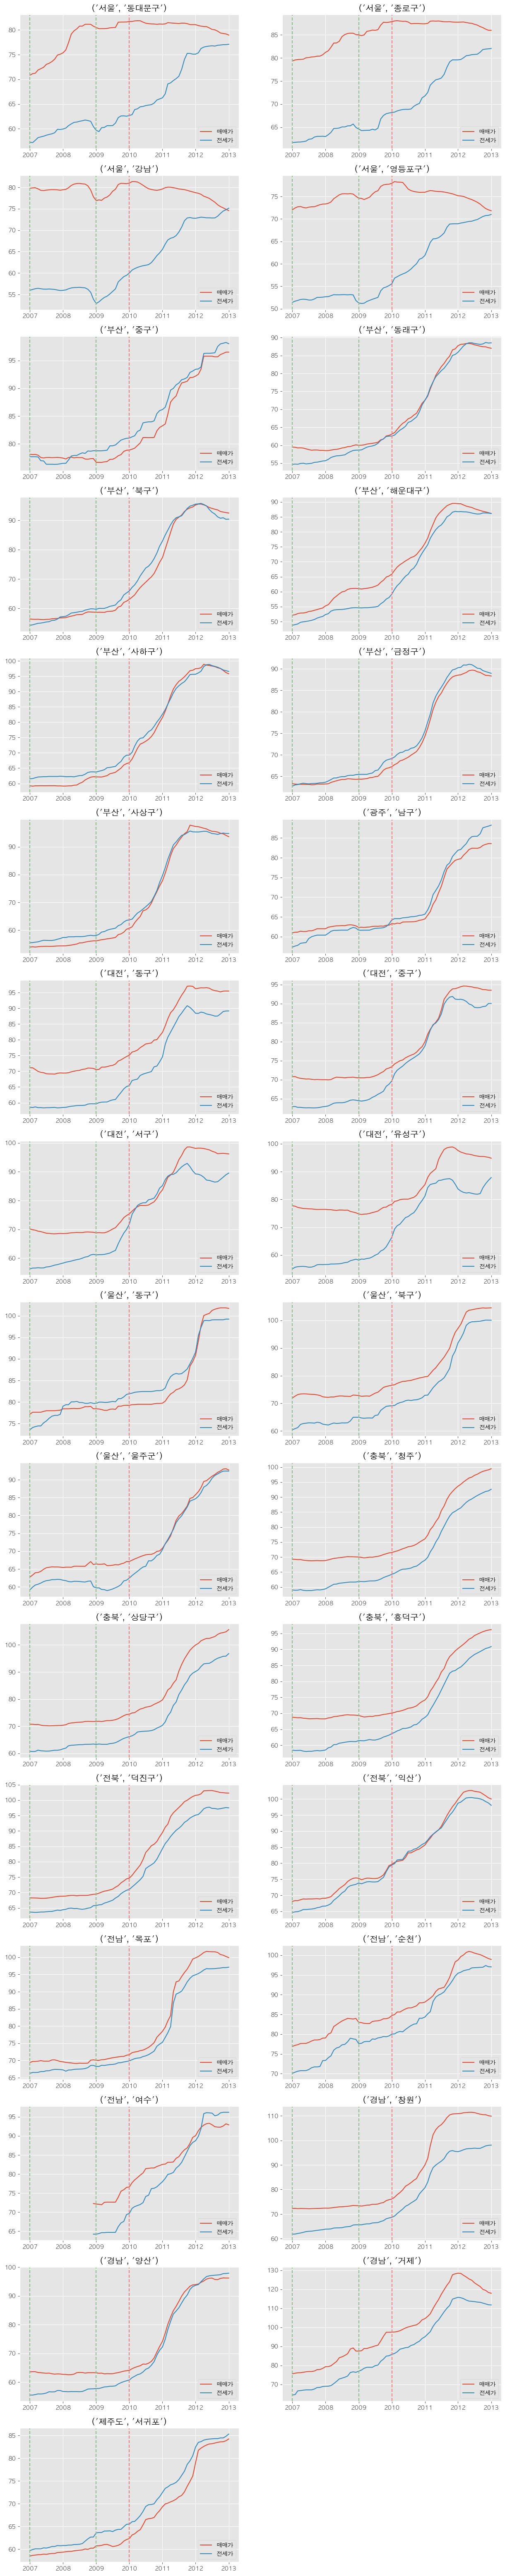

In [36]:
index_date = datetime(2010, 1, 1)

time_range = 12
prev_date = index_date - relativedelta(months=time_range)
prev_date2 = index_date - relativedelta(months=time_range * 3)
graph_start = index_date - relativedelta(months=time_range * 3)
graph_end = index_date + relativedelta(months=time_range * 3)

num_row = int((len(demand_ex.index)-1)/2)+1

plt.figure(figsize=(15, num_row*5))
for i, spot in enumerate(demand_ex.index):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    si = spot[0]
    gu = spot[1]
    plt.plot(price_index[si][gu][graph_start:graph_end], label='매매가')
    plt.plot(jeonse_index[si][gu][graph_start:graph_end], label='전세가')
    plt.axvline(x=index_date, color='lightcoral', linestyle='--')
    plt.axvline(x=prev_date, color='darkseagreen', linestyle='--')
    plt.axvline(x=prev_date2, color='darkseagreen', linestyle='--')
    plt.legend(loc='lower right')
    
plt.show()